In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os 
import numpy as np
import openml

In [2]:
res_folder = 'openml_res_min_leaf'
files = os.listdir(res_folder)
#files.remove('.DS_Store')

In [6]:
def plot_file_err(file, folder, ax=None, ticksize=25, fontsize=30):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
    data_id = file[:-4]
    data_id = int(data_id[12:])

    dataset = openml.datasets.get_dataset(data_id)
    X, y, is_categorical, _ = dataset.get_data(
            dataset_format="array", target=dataset.default_target_attribute
        )
    total_classes = np.unique(y)

    df = pd.read_csv(folder+'/'+file)
    samples = np.unique(df['samples'])

    title_strng = str(len(total_classes)*samples[-1]) + ', ' + str(X.shape[1]) +', ' + str(len(total_classes)) +', ' + str(data_id)
    err_kdf_med = []
    err_kdf_25 = []
    err_kdf_75 = []
    err_rf_med = []
    err_rf_25 = []
    err_rf_75 = []

    for sample in samples:
        kdf = df['err_kdf'][df['samples']==sample]
        rf = df['err_rf'][df['samples']==sample]

        err_kdf_med.append(
            np.median(kdf)
        )
        qunatiles = np.quantile(kdf,[.25,.75],axis=0)
        err_kdf_25.append(
            qunatiles[0]
        )
        err_kdf_75.append(
            qunatiles[1]
        )

        err_rf_med.append(
            np.median(rf)
        )
        qunatiles = np.quantile(rf,[.25,.75],axis=0)
        err_rf_25.append(
            qunatiles[0]
        )
        err_rf_75.append(
            qunatiles[1]
        )
    ax.hlines(1-1/len(total_classes), 0, samples[-1], colors='k', linestyles='dashed')
    ax.plot(samples, err_kdf_med, c='r', linewidth=3)
    ax.fill_between(samples, err_kdf_25, err_kdf_75, facecolor='r', alpha=.3)
    ax.plot(samples, err_rf_med, c='b', linewidth=2)
    ax.fill_between(samples, err_rf_25, err_rf_75, facecolor='b', alpha=.3)
    ax.set_xscale("log")
    ax.set_xticks([])
    ax.set_yticks([0, 1])
    ax.tick_params(labelsize=ticksize)
    ax.set_title(title_strng, fontsize=fontsize)

In [7]:
def plot_file_ece(file, folder, ax=None, ticksize=25, fontsize=30):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
    data_id = file[:-4]
    data_id = int(data_id[12:])

    dataset = openml.datasets.get_dataset(data_id)
    X, y, is_categorical, _ = dataset.get_data(
            dataset_format="array", target=dataset.default_target_attribute
        )
    total_classes = np.unique(y)

    df = pd.read_csv(folder+'/'+file)
    samples = np.unique(df['samples'])

    title_strng = str(len(total_classes)*samples[-1]) + ', ' + str(X.shape[1]) +', ' + str(len(total_classes)) +', ' + str(data_id)
    err_kdf_med = []
    err_kdf_25 = []
    err_kdf_75 = []
    err_rf_med = []
    err_rf_25 = []
    err_rf_75 = []

    for sample in samples:
        kdf = df['ece_kdf'][df['samples']==sample]
        rf = df['ece_rf'][df['samples']==sample]

        err_kdf_med.append(
            np.median(kdf)
        )
        qunatiles = np.quantile(kdf,[.25,.75],axis=0)
        err_kdf_25.append(
            qunatiles[0]
        )
        err_kdf_75.append(
            qunatiles[1]
        )

        err_rf_med.append(
            np.median(rf)
        )
        qunatiles = np.quantile(rf,[.25,.75],axis=0)
        err_rf_25.append(
            qunatiles[0]
        )
        err_rf_75.append(
            qunatiles[1]
        )
    ax.plot(samples, err_kdf_med, c='r', linewidth=3)
    ax.fill_between(samples, err_kdf_25, err_kdf_75, facecolor='r', alpha=.3)
    ax.plot(samples, err_rf_med, c='b', linewidth=2)
    ax.fill_between(samples, err_rf_25, err_rf_75, facecolor='b', alpha=.3)
    ax.set_xscale("log")
    ax.set_xticks([])
    ax.set_yticks([0, 1])
    ax.tick_params(labelsize=ticksize)
    ax.set_title(title_strng, fontsize=fontsize)

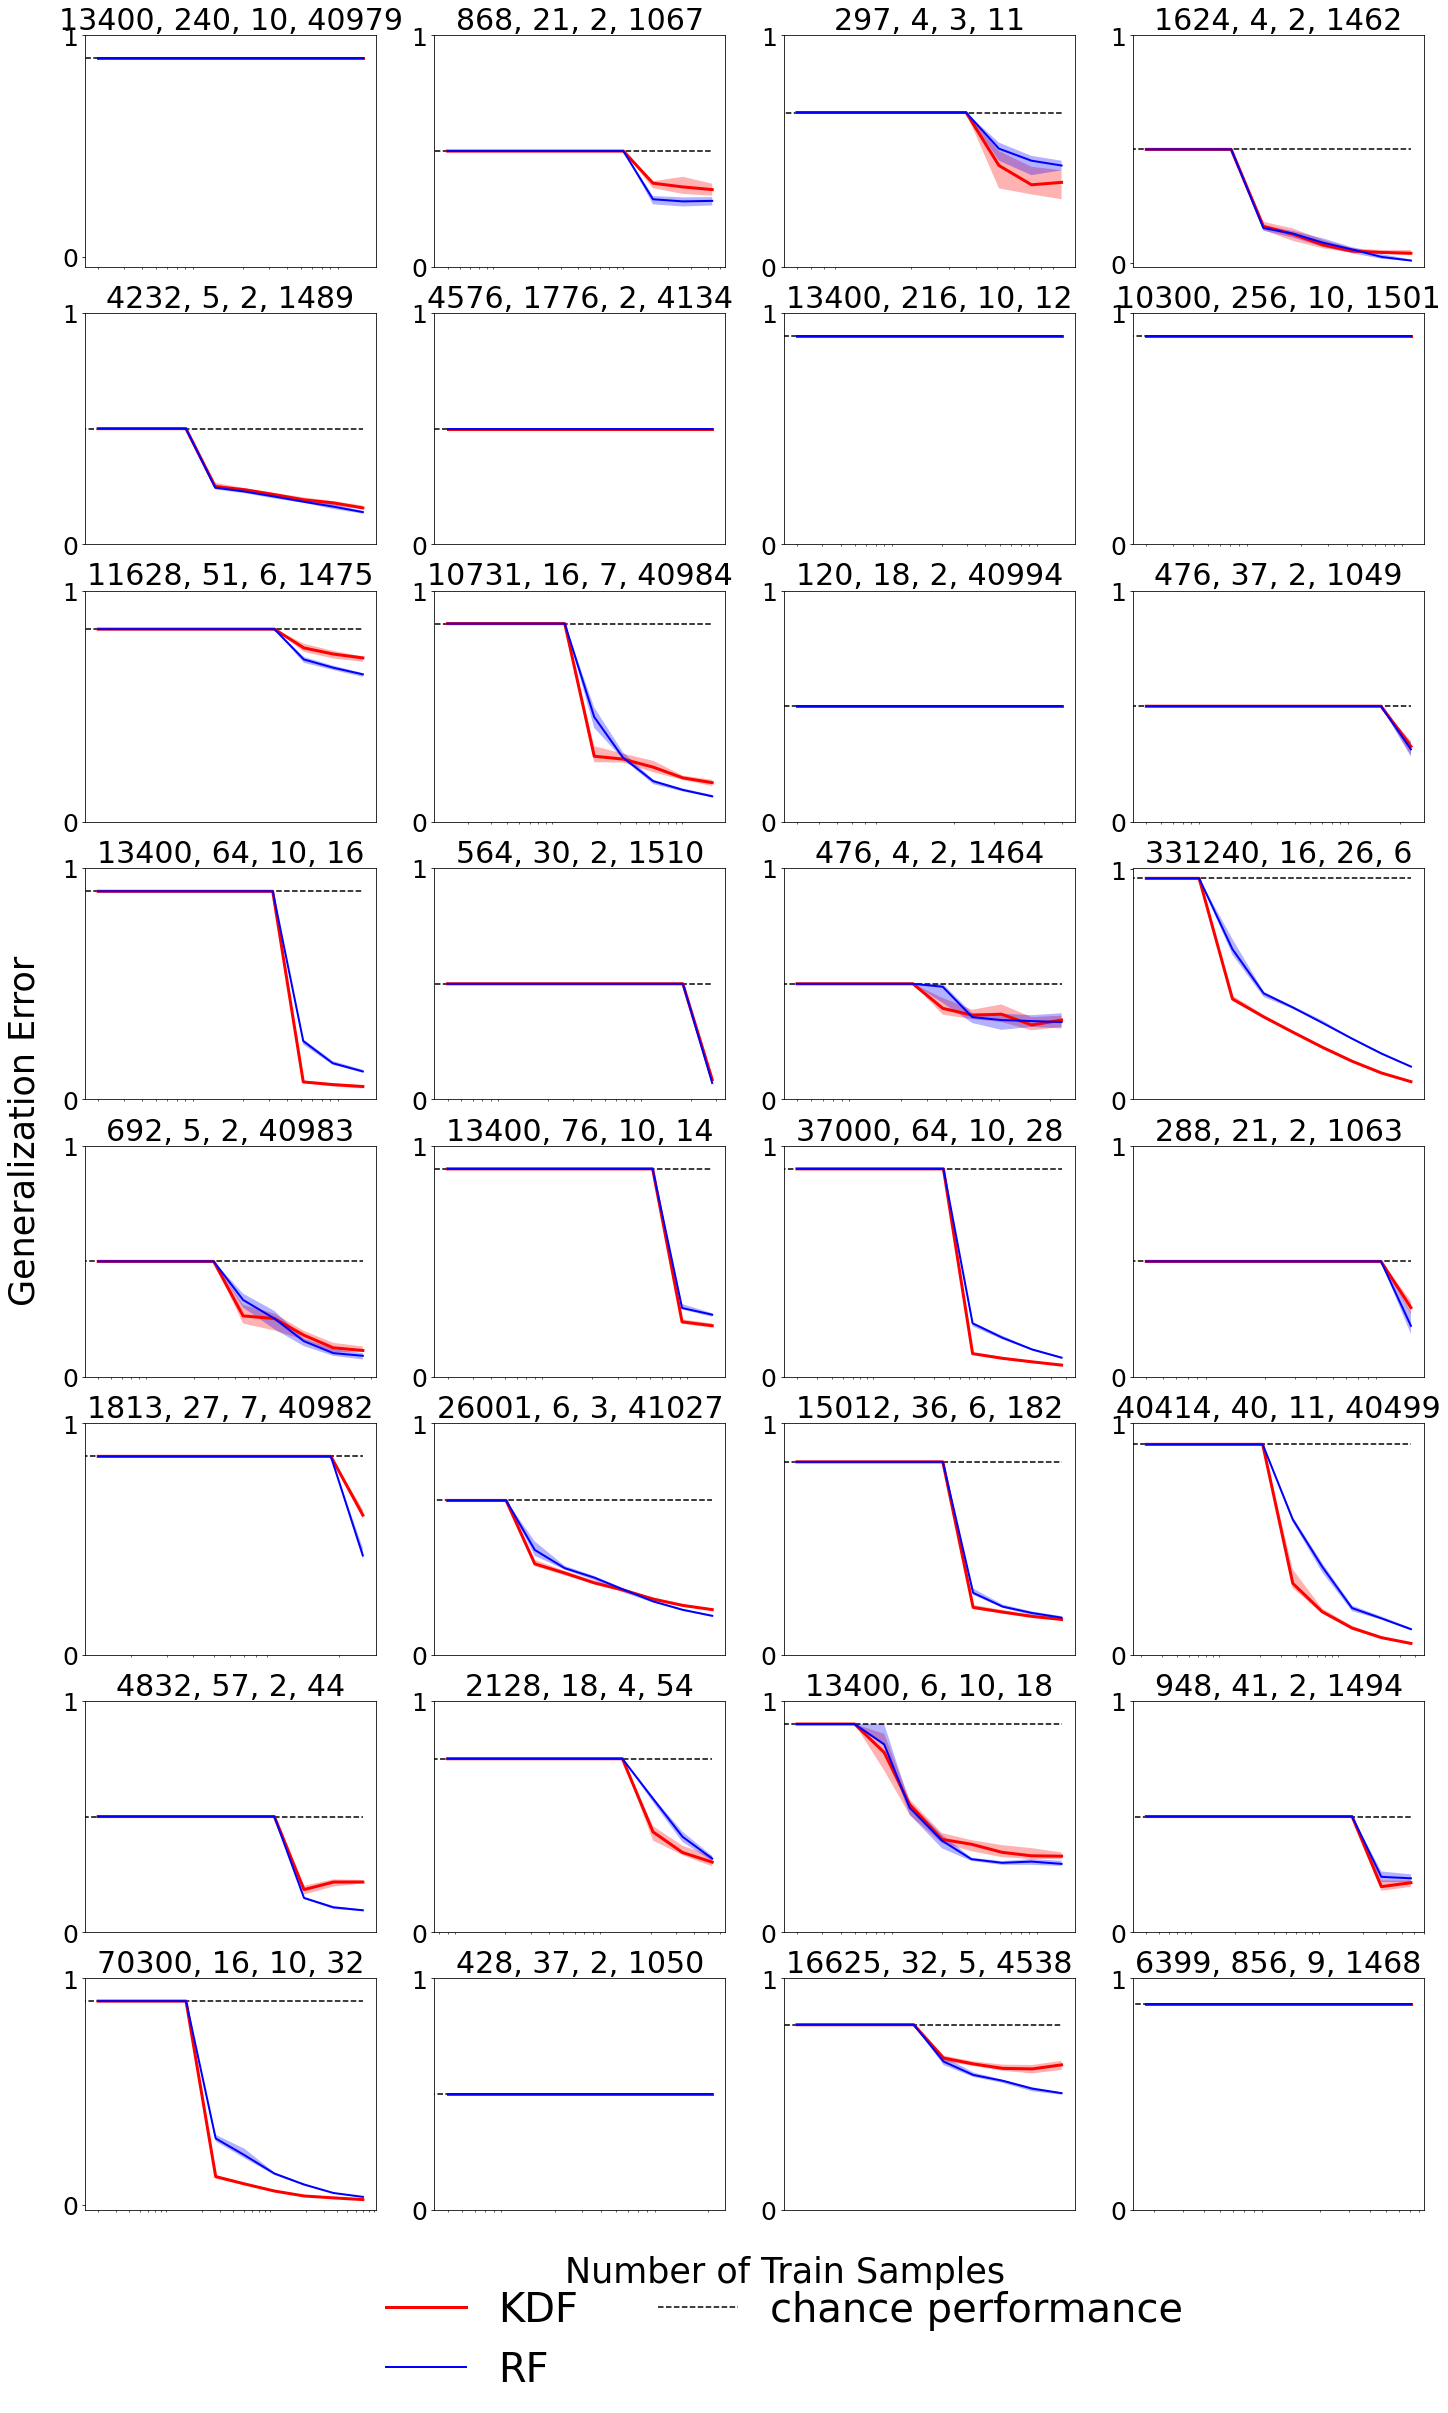

In [10]:
rows = 8
cols = 4

fig, ax = plt.subplots(rows, cols, figsize=(cols*6, rows*5))
fig.text(0.53, 0.1, "Number of Train Samples", ha="center", fontsize=35)
fig.text(0.08, 0.5, "Generalization Error", va="center", rotation="vertical", fontsize=35)

ax[0][0].plot(0, 0, c='r', linewidth=3, label='KDF')
ax[0][0].plot(0, 0, c='b', linewidth=2, label='RF')
ax[0][0].plot(0, 0, c='k', linestyle='dashed', label='chance performance')
for row in range(rows):
    for col in range(cols):
        plot_file_err(files[row*cols + col],res_folder, ax=ax[row][col])

leg = fig.legend(
    fontsize=40,
    frameon=False,
    bbox_to_anchor=(0.53, 0.05),
    bbox_transform=plt.gcf().transFigure,
    ncol=2,
    loc="lower center",
)
plt.savefig("plots/openml_err.pdf", transparent=True, bbox_inches="tight")

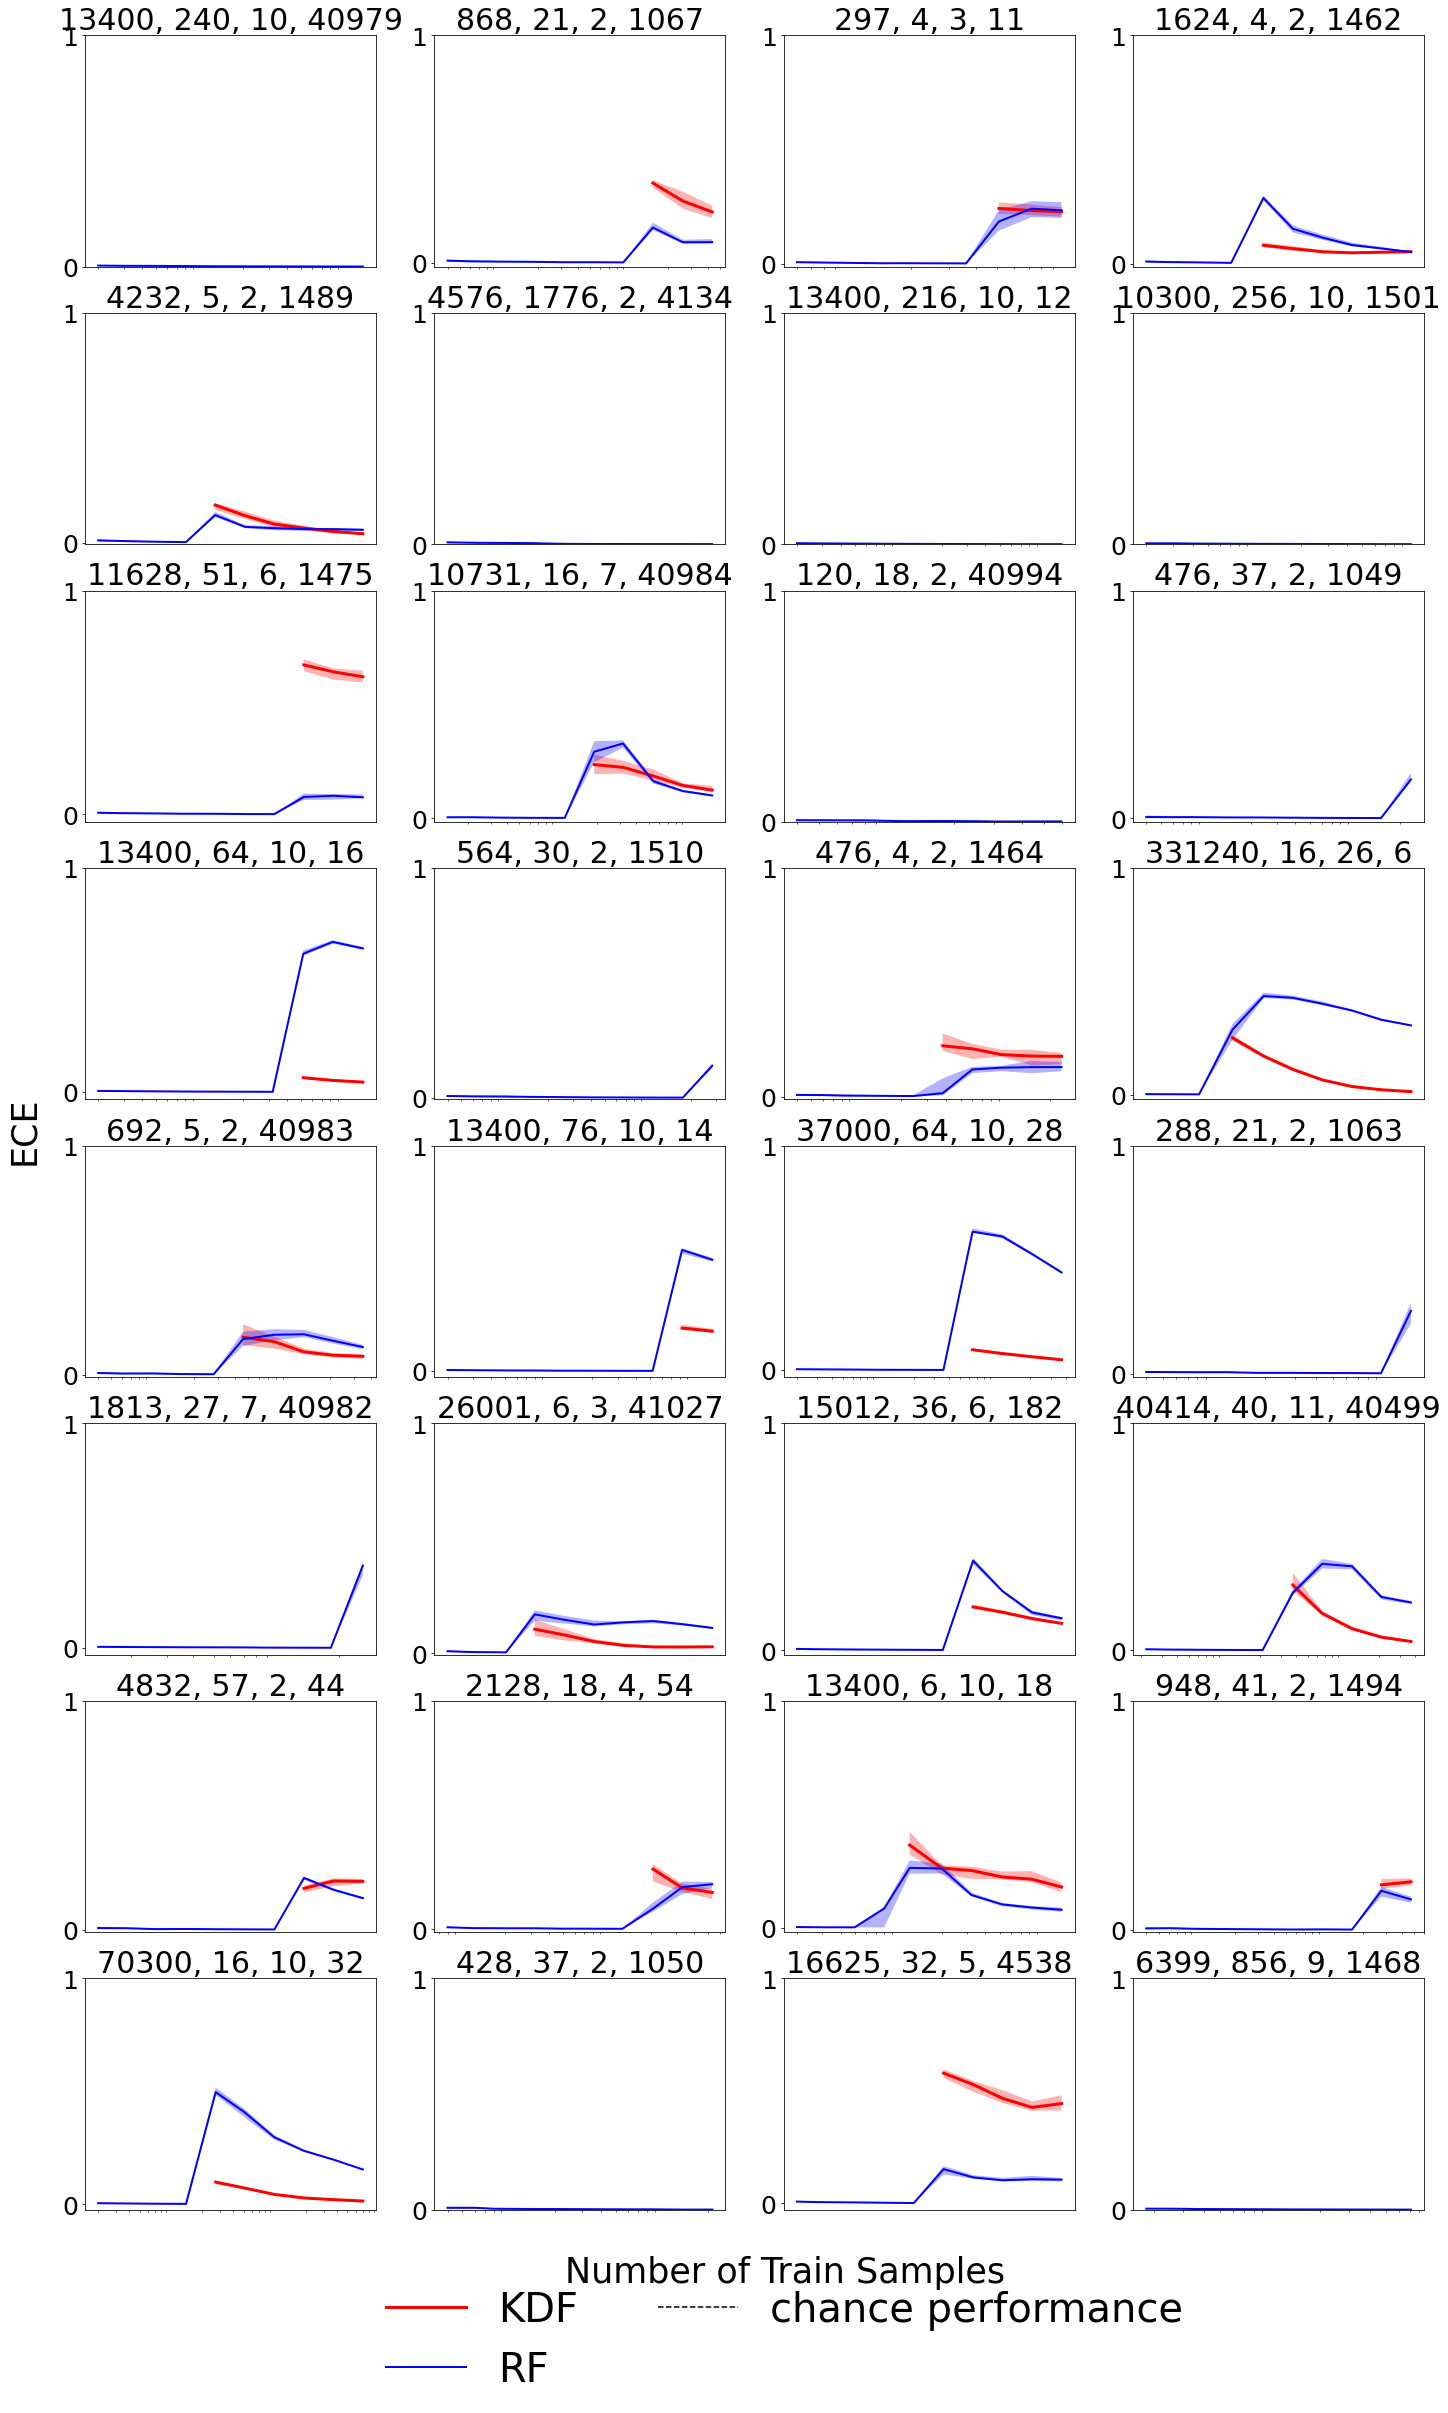

In [9]:
rows = 8
cols = 4

fig, ax = plt.subplots(rows, cols, figsize=(cols*6, rows*5))
fig.text(0.53, 0.1, "Number of Train Samples", ha="center", fontsize=35)
fig.text(0.08, 0.5, "ECE", va="center", rotation="vertical", fontsize=35)

ax[0][0].plot(0, 0, c='r', linewidth=3, label='KDF')
ax[0][0].plot(0, 0, c='b', linewidth=2, label='RF')

for row in range(rows):
    for col in range(cols):
        plot_file_ece(files[row*cols + col],res_folder, ax=ax[row][col])
 
leg = fig.legend(
    fontsize=40,
    frameon=False,
    bbox_to_anchor=(0.53, 0.05),
    bbox_transform=plt.gcf().transFigure,
    ncol=2,
    loc="lower center",
)
plt.savefig("plots/openml_ece.pdf", transparent=True, bbox_inches="tight")

### Plot individual data

In [3]:
def plot_data_err(feature, ax=None, ticksize=25, fontsize=30):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
    data_id = 40984

    dataset = openml.datasets.get_dataset(data_id)
    X, y, is_categorical, _ = dataset.get_data(
            dataset_format="array", target=dataset.default_target_attribute
        )
    total_classes = np.unique(y)

    df = pd.read_csv('openml_res/openML_cc18_40984_'+str(feature)+'.csv')
    samples = np.unique(df['samples'])

    title_strng = str(len(total_classes)*samples[-1]) + ', ' + str(X.shape[1]) +', ' + str(len(total_classes)) +', ' + str(data_id)
    err_kdf_med = []
    err_kdf_25 = []
    err_kdf_75 = []
    err_train_med = []
    err_train_25 = []
    err_train_75 = []
    err_rf_med = []
    err_rf_25 = []
    err_rf_75 = []

    for sample in samples:
        kdf = df['err_kdf'][df['samples']==sample]
        rf = df['err_rf'][df['samples']==sample]
        kdf_train = df['err_kdf_train'][df['samples']==sample]

        err_kdf_med.append(
            np.median(kdf)
        )
        qunatiles = np.quantile(kdf,[.25,.75],axis=0)
        err_kdf_25.append(
            qunatiles[0]
        )
        err_kdf_75.append(
            qunatiles[1]
        )

        err_train_med.append(
            np.median(kdf_train)
        )
        qunatiles = np.quantile(kdf_train,[.25,.75],axis=0)
        err_train_25.append(
            qunatiles[0]
        )
        err_train_75.append(
            qunatiles[1]
        )

        err_rf_med.append(
            np.median(rf)
        )
        qunatiles = np.quantile(rf,[.25,.75],axis=0)
        err_rf_25.append(
            qunatiles[0]
        )
        err_rf_75.append(
            qunatiles[1]
        )
    ax.plot(samples, err_train_med, c='k', linewidth=3)
    ax.fill_between(samples, err_train_25, err_train_75, facecolor='k', alpha=.3)
    ax.plot(samples, err_kdf_med, c='r', linewidth=3)
    ax.fill_between(samples, err_kdf_25, err_kdf_75, facecolor='r', alpha=.3)
    ax.plot(samples, err_rf_med, c='b', linewidth=2)
    ax.fill_between(samples, err_rf_25, err_rf_75, facecolor='b', alpha=.3)
    ax.set_xscale("log")
    ax.set_xticks([])
    ax.set_yticks([0, 1])
    ax.tick_params(labelsize=ticksize)
    ax.set_title(title_strng, fontsize=fontsize)



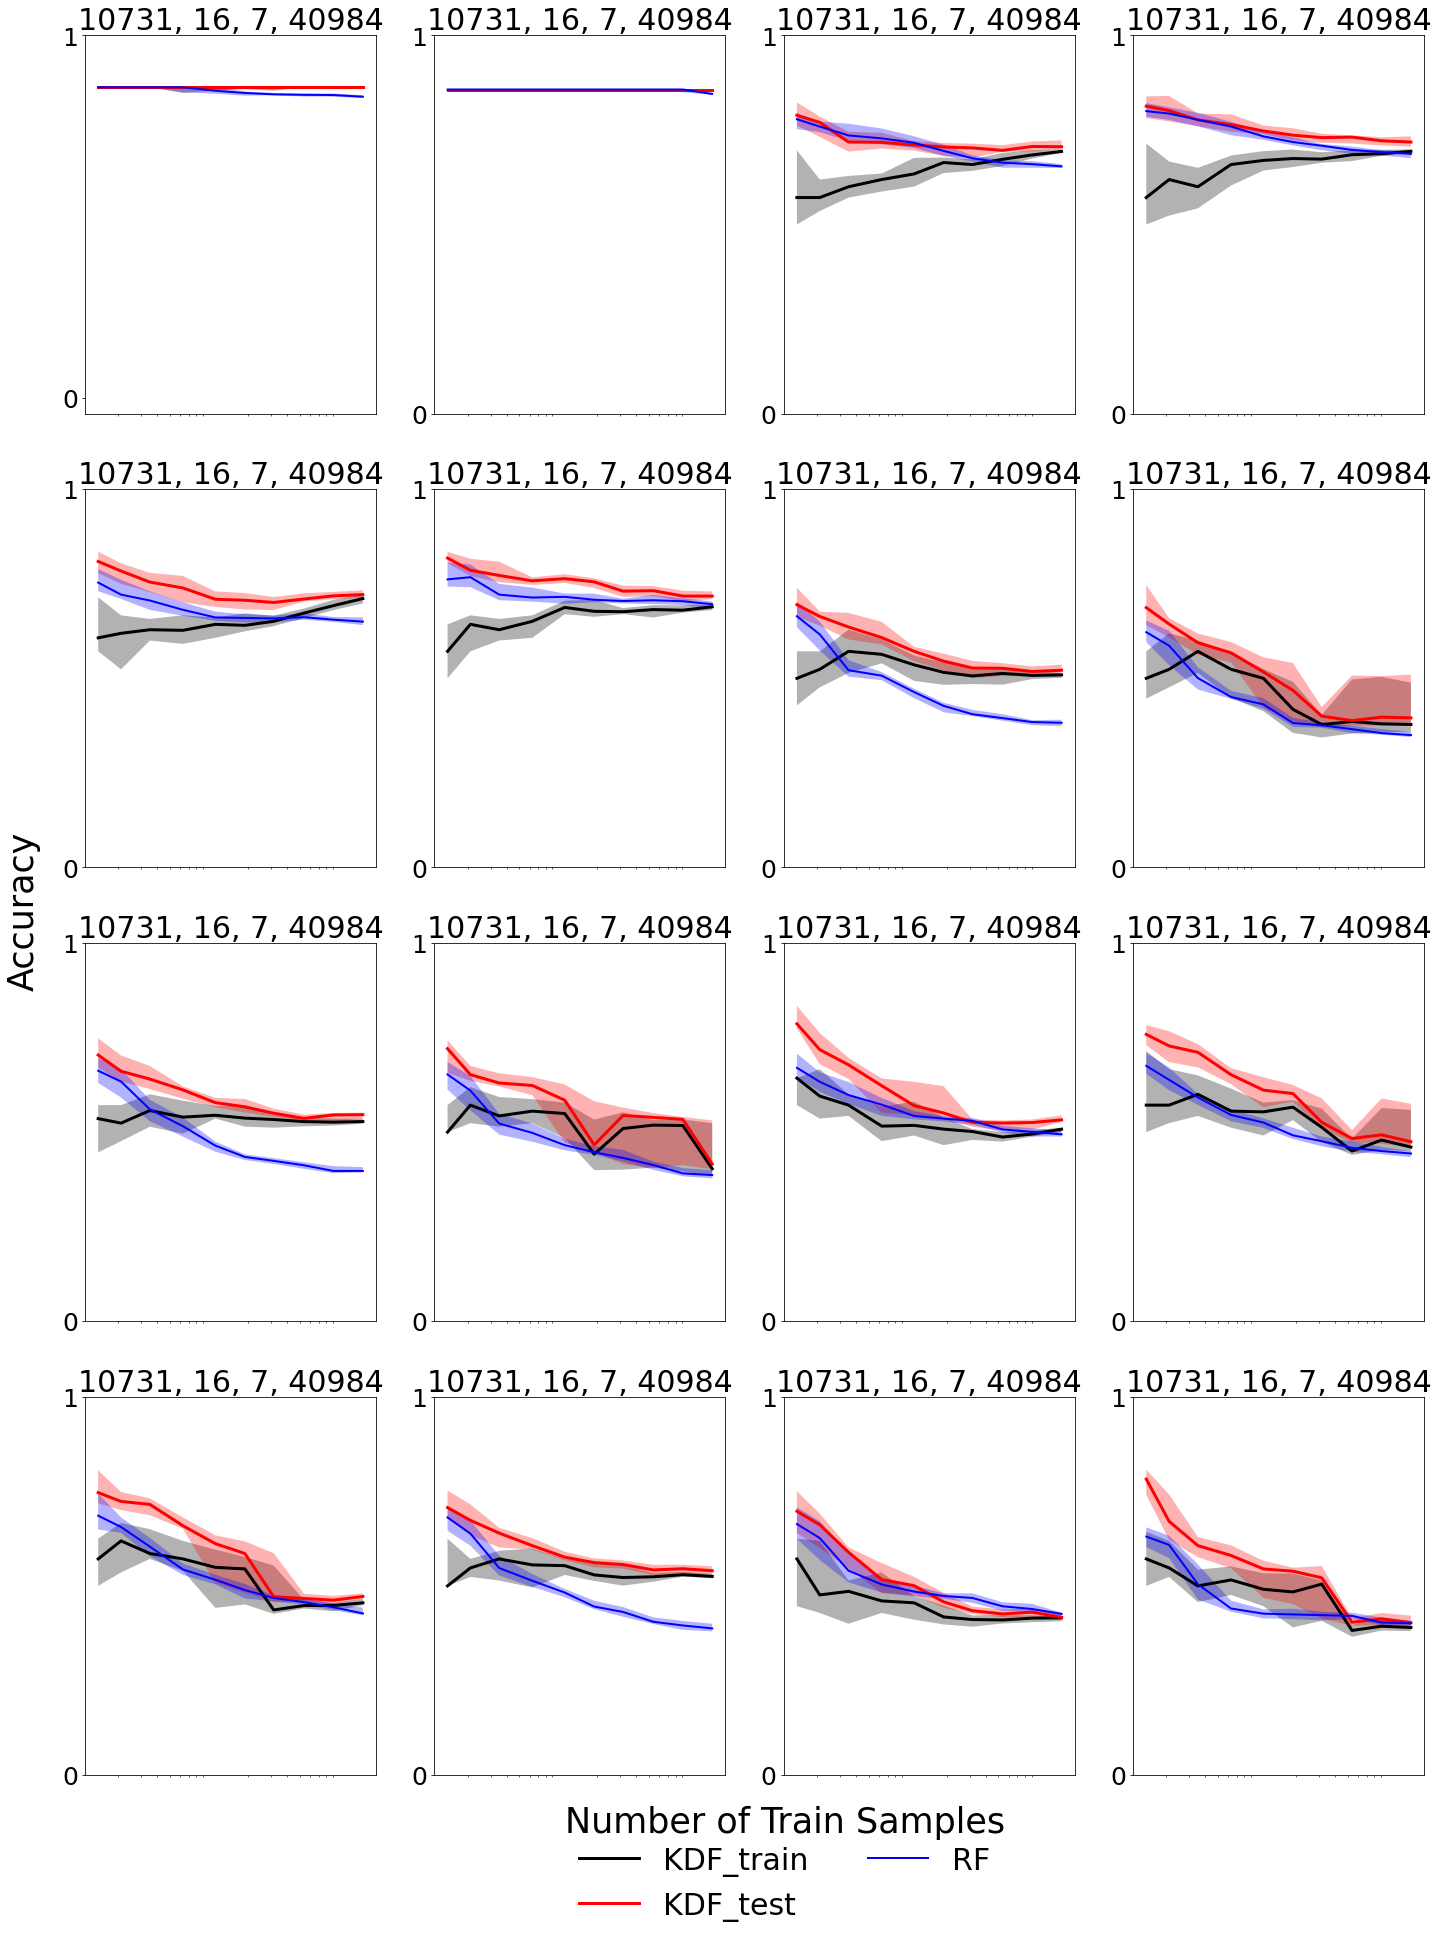

In [4]:
rows = 4
cols = 4

fig, ax = plt.subplots(rows, cols, figsize=(cols*6, rows*8))
fig.text(0.53, 0.1, "Number of Train Samples", ha="center", fontsize=35)
fig.text(0.08, 0.5, "Accuracy", va="center", rotation="vertical", fontsize=35)

ax[0][0].plot(0, 0, c='k', linewidth=3, label='KDF_train')
ax[0][0].plot(0, 0, c='r', linewidth=3, label='KDF_test')
ax[0][0].plot(0, 0, c='b', linewidth=2, label='RF')
for row in range(rows):
    for col in range(cols):
        plot_data_err(row*cols + col, ax=ax[row][col])

leg = fig.legend(
    fontsize=30,
    frameon=False,
    bbox_to_anchor=(0.53, 0.05),
    bbox_transform=plt.gcf().transFigure,
    ncol=2,
    loc="lower center",
)
#plt.savefig("plots/openml_one_data_err.pdf", transparent=True, bbox_inches="tight")

In [5]:
def plot_data_polytope(feature, ax=None, ticksize=25, fontsize=30):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
    data_id = 40984

    dataset = openml.datasets.get_dataset(data_id)
    X, y, is_categorical, _ = dataset.get_data(
            dataset_format="array", target=dataset.default_target_attribute
        )
    total_classes = np.unique(y)

    df = pd.read_csv('openml_res/openML_cc18_40984_'+str(feature)+'.csv')
    samples = np.unique(df['samples'])

    title_strng = str(len(total_classes)*samples[-1]) + ', ' + str(X.shape[1]) +', ' + str(len(total_classes)) +', ' + str(data_id)
    polytope_kdf_med = []
    polytope_kdf_25 = []
    polytope_kdf_75 = []

    for sample in samples:
        kdf = df['total_polytopes'][df['samples']==sample]

        polytope_kdf_med.append(
            np.median(kdf)
        )
        qunatiles = np.quantile(kdf,[.25,.75],axis=0)
        polytope_kdf_25.append(
            qunatiles[0]
        )
        polytope_kdf_75.append(
            qunatiles[1]
        )
    title_strng = str(len(total_classes)*samples[-1]) + ', ' + str(feature) +', ' + str(len(total_classes)) +', ' + str(max(polytope_kdf_med))
    ax.plot(samples, polytope_kdf_med, c='k', linewidth=3)
    ax.fill_between(samples, polytope_kdf_25, polytope_kdf_75, facecolor='k', alpha=.3)
    ax.set_xscale("log")
    ax.set_xticks([])
    ax.set_yticks([0, 1])
    ax.tick_params(labelsize=ticksize)
    ax.set_title(title_strng, fontsize=fontsize)



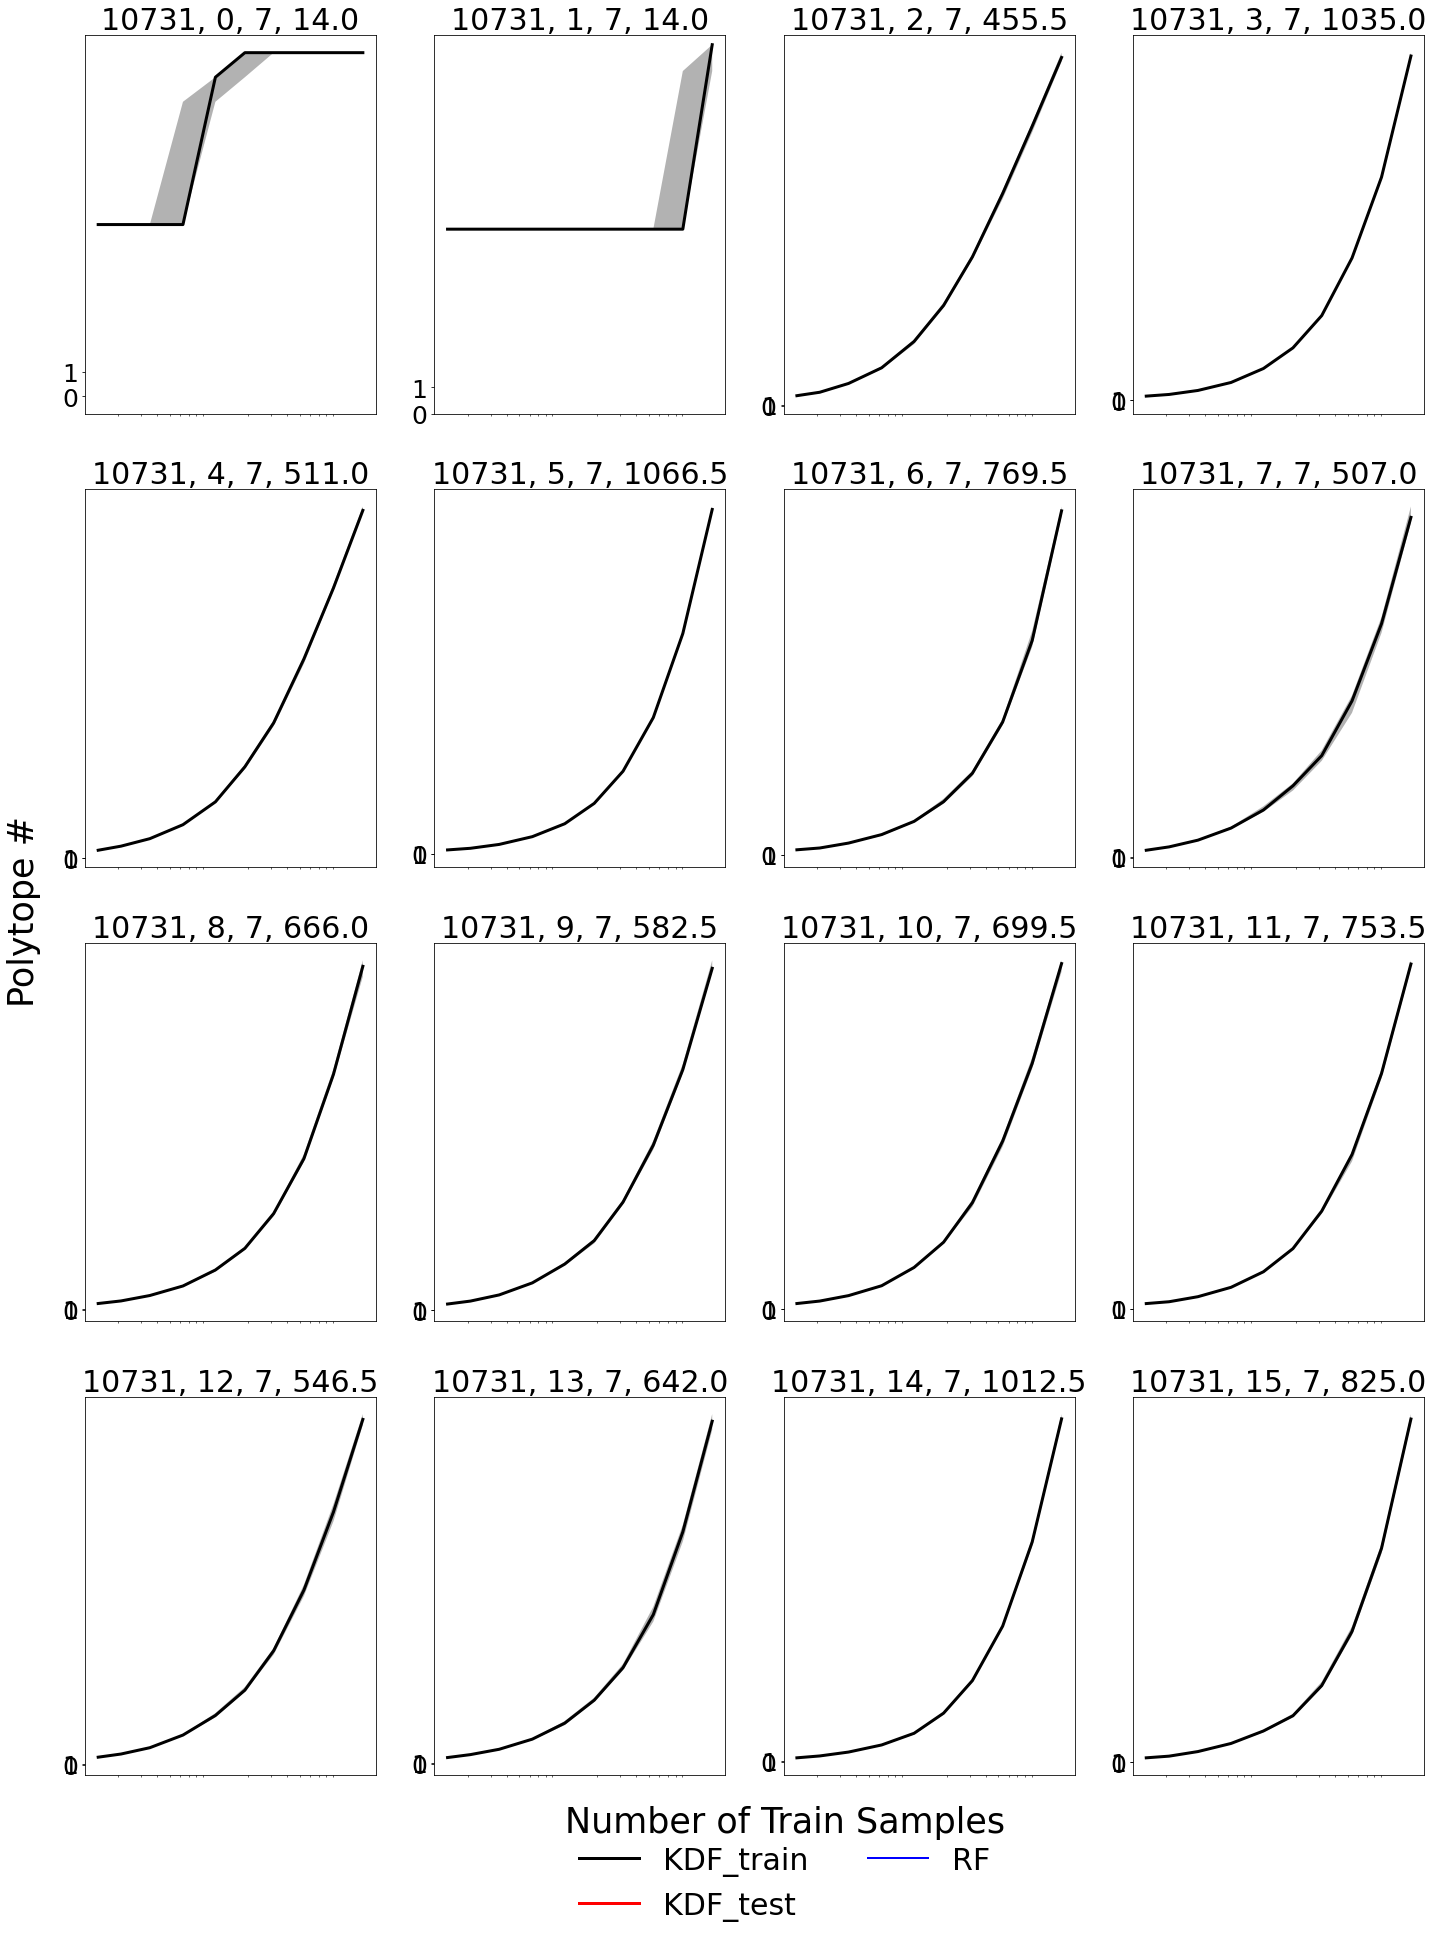

In [6]:
rows = 4
cols = 4

fig, ax = plt.subplots(rows, cols, figsize=(cols*6, rows*8))
fig.text(0.53, 0.1, "Number of Train Samples", ha="center", fontsize=35)
fig.text(0.08, 0.5, "Polytope #", va="center", rotation="vertical", fontsize=35)

ax[0][0].plot(0, 0, c='k', linewidth=3, label='KDF_train')
ax[0][0].plot(0, 0, c='r', linewidth=3, label='KDF_test')
ax[0][0].plot(0, 0, c='b', linewidth=2, label='RF')
for row in range(rows):
    for col in range(cols):
        plot_data_polytope(row*cols + col, ax=ax[row][col])

leg = fig.legend(
    fontsize=30,
    frameon=False,
    bbox_to_anchor=(0.53, 0.05),
    bbox_transform=plt.gcf().transFigure,
    ncol=2,
    loc="lower center",
)
#plt.savefig("plots/openml_one_data_err.pdf", transparent=True, bbox_inches="tight")